In [31]:
#pca
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [32]:
train_files = os.listdir('train_40_csv')
test_files = os.listdir('test_10_csv')
print(train_files.__len__())
print(test_files.__len__())

40
10


In [33]:
# take a look at the 1 file in the train set and the 1 file in the test set
train = pd.read_csv('train_40_csv/' + train_files[0])
test = pd.read_csv('test_10_csv/' + test_files[0])
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea1    7499 non-null   float64
 1   fea2    7499 non-null   float64
 2   fea3    7499 non-null   float64
 3   fea4    7499 non-null   float64
 4   ans     7499 non-null   float64
dtypes: float64(5)
memory usage: 293.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea1    7499 non-null   float64
 1   fea2    7499 non-null   float64
 2   fea3    7499 non-null   float64
 3   fea4    7499 non-null   float64
 4   ans     7499 non-null   float64
dtypes: float64(5)
memory usage: 293.1 KB
None


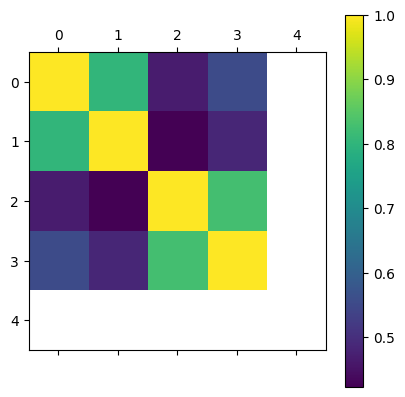

In [34]:
# correlation matrix
corr = train.corr()
plt.matshow(corr)
# color bar
plt.colorbar()
plt.show()

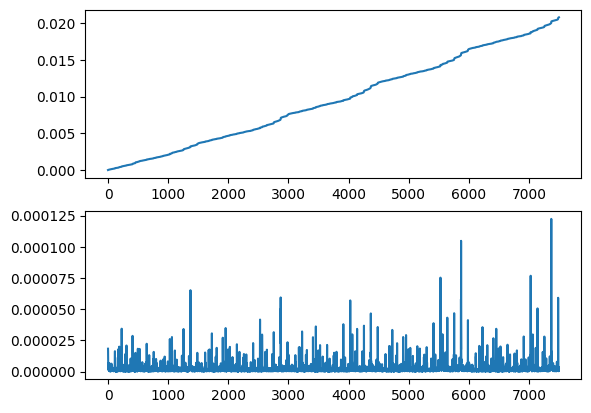

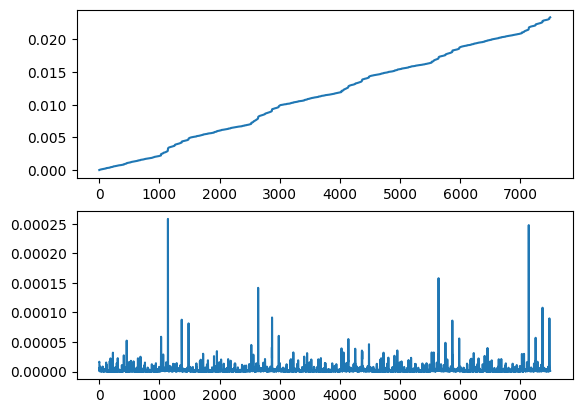

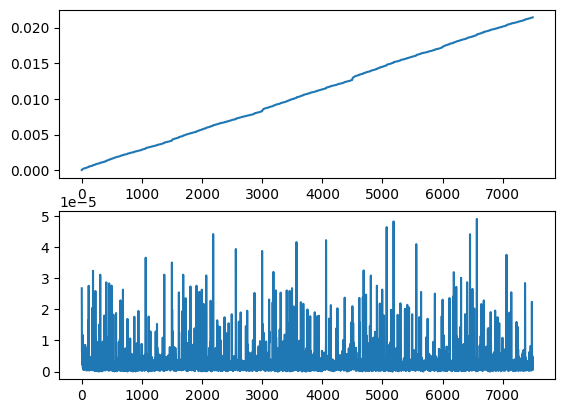

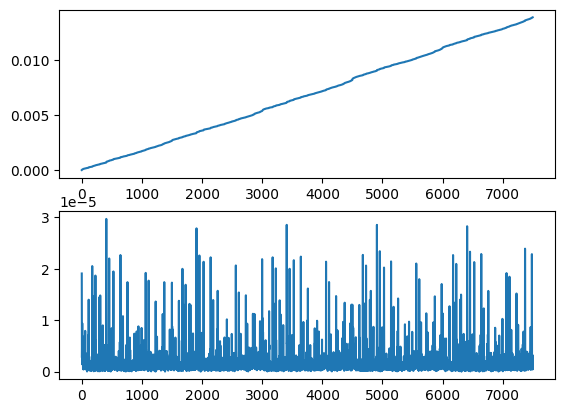

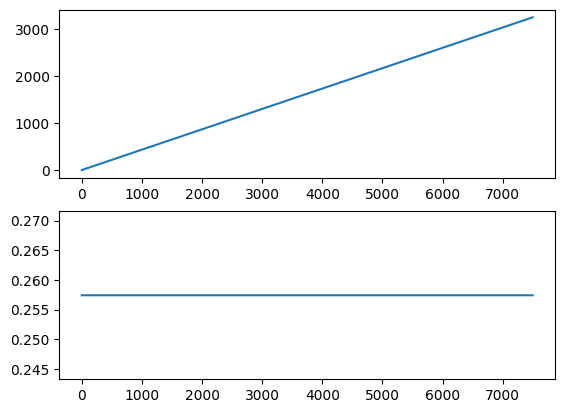

In [35]:
# plot the all col except the ans
for i in range(0,5):
    plt.subplot(211)
    plt.plot(train.iloc[:,i].cumsum())
    plt.subplot(212)
    plt.plot(test.iloc[:,i])
    plt.show()

In [36]:
# load all the data
train_data = []
test_data = []
for file in train_files:
    train_data.append(pd.read_csv('train_40_csv/' + file))
for file in test_files:
    test_data.append(pd.read_csv('test_10_csv/' + file))

# convert the data to numpy array
train_data_np = []
test_data_np = []

for data in train_data:
    train_data_np.append(data.to_numpy())
for data in test_data:
    test_data_np.append(data.to_numpy())

train_data_np = np.array(train_data_np)
test_data_np = np.array(test_data_np)

print(train_data_np.shape)
print(test_data_np.shape)

(40, 7499, 5)
(10, 7499, 5)


In [37]:
train_rbr_x = train_data_np[:, :, :-1].reshape(-1,4)
train_rbr_y = train_data_np[:, :, -1].reshape(-1,1)
test_rbr_x = test_data_np[:, :, :-1].reshape(-1,4)
test_rbr_y = test_data_np[:, :, -1].reshape(-1,1)

print(train_rbr_x.shape)
print(train_rbr_y.shape)
print(test_rbr_x.shape)
print(test_rbr_y.shape)

(299960, 4)
(299960, 1)
(74990, 4)
(74990, 1)


In [38]:
#cumsum
train_data_np_cumsum = np.cumsum(train_data_np, axis=2)
test_data_np_cumsum = np.cumsum(test_data_np, axis=2)

print(train_data_np_cumsum.shape)
print(test_data_np_cumsum.shape)

(40, 7499, 5)
(10, 7499, 5)


In [39]:
# pca per col
train_data_pca = []
test_data_pca = []
components = 32

# cumsum

for i in range(0,4):
    pca = PCA(n_components=components)
    pca.fit(train_data_np[:,:,i])
    # show the total explained variance
    print(np.sum(pca.explained_variance_ratio_))

    #cumsum pca
    

    train_data_pca.append(pca.transform(train_data_np[:,:,i]))
    test_data_pca.append(pca.transform(test_data_np[:,:,i]))

    #cumsum pca
    pca = PCA(n_components=components)
    pca.fit(train_data_np_cumsum[:,:,i])

    # show the total explained variance
    print(np.sum(pca.explained_variance_ratio_))

    train_data_pca.append(pca.transform(train_data_np_cumsum[:,:,i]))
    test_data_pca.append(pca.transform(test_data_np_cumsum[:,:,i]))



train_data_pca = np.array(train_data_pca).reshape(40,components*8)
test_data_pca = np.array(test_data_pca).reshape(10,components*8)

print(train_data_pca.shape)
print(test_data_pca.shape)

0.988852446879838
0.988852446879838
0.9932329479803462
0.9926778780515999
0.9796454309451901
0.9909394245977383
0.9648093967088703
0.9893740223940645
(40, 256)
(10, 256)


In [40]:
# append statistics from pd as more features
train_stats = []
test_stats = []
i = 0
for data in train_data:
    train_stats.append(data.iloc[:,:-1].describe().to_numpy()[1:].flatten())
    while i<1:
        print(data.describe())
        i += 1
for data in test_data:
    test_stats.append(data.iloc[:,:-1].describe().to_numpy()[1:].flatten())

train_stats = np.array(train_stats)
test_stats = np.array(test_stats)

print(train_stats.shape)
print(test_stats.shape)

train_data_pca = np.concatenate((train_data_pca, train_stats), axis=1)
test_data_pca = np.concatenate((test_data_pca, test_stats), axis=1)
#train_data_pca = train_stats
#test_data_pca = test_stats

print(train_data_pca.shape)
print(test_data_pca.shape)

               fea1          fea2          fea3          fea4           ans
count  7.499000e+03  7.499000e+03  7.499000e+03  7.499000e+03  7.499000e+03
mean   2.771875e-06  3.115627e-06  2.860535e-06  1.858602e-06  4.328000e-01
std    6.325471e-06  7.110561e-06  4.096251e-06  2.479123e-06  5.551485e-17
min    1.795078e-08  3.218993e-08  2.954729e-08  2.139095e-08  4.328000e-01
25%    9.336110e-07  9.979087e-07  1.169926e-06  8.010409e-07  4.328000e-01
50%    1.566607e-06  1.699473e-06  1.906195e-06  1.289252e-06  4.328000e-01
75%    2.624075e-06  3.000749e-06  2.941468e-06  2.013957e-06  4.328000e-01
max    1.648137e-04  1.931511e-04  8.595528e-05  4.039629e-05  4.328000e-01
(40, 28)
(10, 28)
(40, 284)
(10, 284)


In [41]:
#dwt
import pywt

train_data_dwt = []
test_data_dwt = []

for sample in range(0,40):
    for i in range(0,4):
        train_data_dwt.append(pywt.dwt(train_data_np[sample][:,i], 'db2'))
    
#reshape
train_data_dwt = np.array(train_data_dwt).reshape(40,-1)

for sample in range(0,10):
    for i in range(0,4):
        test_data_dwt.append(pywt.dwt(test_data_np[sample][:,i], 'db2'))

#reshape
test_data_dwt = np.array(test_data_dwt).reshape(10,-1)

print(train_data_dwt.shape)
print(test_data_dwt.shape)

# pca
pca = PCA(n_components=16)
pca.fit(train_data_dwt)
print(np.sum(pca.explained_variance_ratio_))
      
train_data_dwt = pca.transform(train_data_dwt)
test_data_dwt = pca.transform(test_data_dwt)

print(train_data_dwt.shape)
print(test_data_dwt.shape)

train_data_pca = np.concatenate((train_data_pca, train_data_dwt), axis=1)
test_data_pca = np.concatenate((test_data_pca, test_data_dwt), axis=1)

print(train_data_pca.shape)
print(test_data_pca.shape)

(40, 30008)
(10, 30008)
0.9234744737356161
(40, 16)
(10, 16)
(40, 300)
(10, 300)


In [42]:
# ans is the last col
train_ans = train_data_np[:,0,-1]
test_ans = test_data_np[:,0,-1]
print(train_ans.shape)
print(test_ans.shape)

(40,)
(10,)


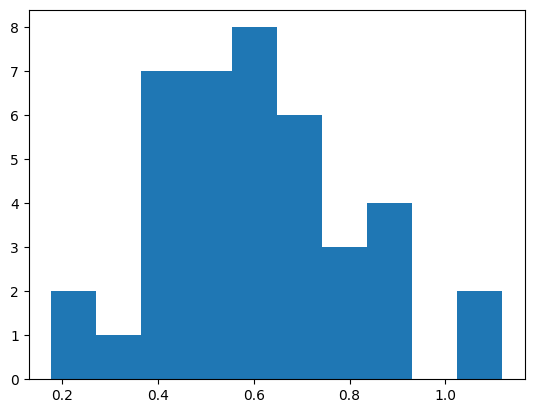

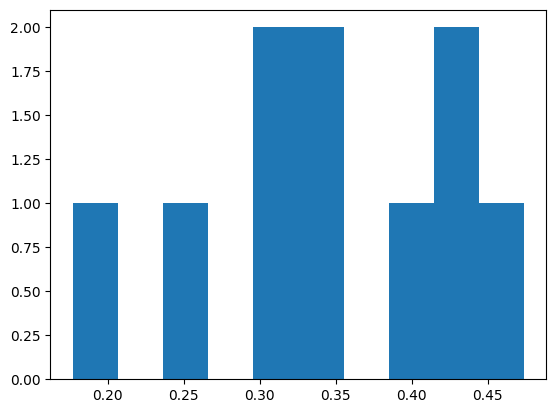

In [43]:
# plot the distribution of the ans
plt.hist(train_ans, bins=10)
plt.show()
plt.hist(test_ans, bins=10)
plt.show()

In [44]:
from xgboost import XGBRegressor
# data split
from sklearn.model_selection import train_test_split

# cv
from sklearn.model_selection import cross_val_score

In [45]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(train_data_pca, train_ans, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(36, 300)
(4, 300)
(36,)
(4,)


In [46]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print(mean_squared_error(y_val, y_pred))
print(np.sum(np.abs(y_val - y_pred) < y_val*0.01) / y_val.shape[0])


0.011509773077251654
0.0


In [47]:
# tabpfn
from tabpfn import TabPFNRegressor

tabpfn = TabPFNRegressor()
tabpfn.fit(X_train, y_train)
y_pred = tabpfn.predict(X_val)
print(mean_squared_error(y_val, y_pred))
print(np.sum(np.abs(y_val - y_pred)/y_val < 0.1) / y_val.shape[0])


0.051675291969732966
0.5


In [48]:

print(np.sum(np.abs(y_pred - y_val)/y_pred < 0.1)/y_val.shape[0])




0.5


In [19]:
# cv
model = XGBRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'cv mse: {scores.mean()}')
#rmse
print(f'cv rmse: {np.sqrt(-scores.mean())}')

# fit the model
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_val)
# is diff less than 1% of the ans is correct
print(np.sum(np.abs(y_pred - y_val)/y_pred < 0.1)/y_val.shape[0])


cv mse: -0.049944795382527885
cv rmse: 0.2234833223811743
0.0


In [20]:
# svr
from sklearn.svm import SVR
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'cv mse: {-scores.mean()}')
#rmse
print(f'cv rmse: {np.sqrt(-scores.mean())}')

# fit the model
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_val)
# is diff less than 1% of the ans is correct
print(np.sum(np.abs(y_pred - y_val) < y_val*0.01)/y_val.shape[0])


cv mse: 0.045814055218486076
cv rmse: 0.21404218093283875
0.0


In [21]:
import optuna


c:\Users\ricky\anaconda3\envs\torch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
def objective(trial):
    # params
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1500),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'random_state': 42,
        'objective': 'reg:squarederror'
    }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(np.mean((y_pred - y_val)**2))
    correct = np.sum(np.abs(y_pred - y_val)/y_pred < 0.1)/y_val.shape[0]

    return correct-rmse

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2025-03-09 17:12:32,143] A new study created in memory with name: no-name-e8ea9e89-cdc9-4c03-ac98-f2e3c3011a8a
[I 2025-03-09 17:12:32,220] Trial 0 finished with value: -0.009967365760055247 and parameters: {'n_estimators': 266, 'max_depth': 8, 'learning_rate': 0.19944940833018404, 'subsample': 0.34252419998033956, 'colsample_bytree': 0.8566599243291656, 'gamma': 7.7069404924928016, 'reg_alpha': 3.722129287993463, 'reg_lambda': 7.522800713093454}. Best is trial 0 with value: -0.009967365760055247.
[I 2025-03-09 17:12:32,348] Trial 1 finished with value: -0.009967365760055247 and parameters: {'n_estimators': 1195, 'max_depth': 8, 'learning_rate': 0.14987179842343948, 'subsample': 0.8852314383423945, 'colsample_bytree': 0.15512122303238807, 'gamma': 7.746605881393882, 'reg_alpha': 7.375068357885951, 'reg_lambda': 0.48690593544048033}. Best is trial 0 with value: -0.009967365760055247.
[I 2025-03-09 17:12:32,409] Trial 2 finished with value: -0.009967365760055247 and parameters: {'n_est

In [23]:
def objective(trial):
    # params
    params = {
        'C': trial.suggest_float('C', 0.0001, 10000),
        'epsilon': trial.suggest_float('epsilon', 0.0001, 1000),
        'degree': trial.suggest_int('degree', 1, 5),
        'gamma': trial.suggest_float('gamma', 0.0001, 10000),
    }
    model = SVR(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(np.mean((y_pred - y_val)**2))
    correct = np.sum(np.abs(y_pred - y_val)/y_pred < 0.1)/y_val.shape[0]

    return correct-rmse

In [24]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2025-03-09 17:16:20,148] A new study created in memory with name: no-name-52b0e8f0-eec3-46c3-9f38-3a276ad1759f
[I 2025-03-09 17:16:20,154] Trial 0 finished with value: 0.02770256974045157 and parameters: {'C': 1095.0391152633674, 'epsilon': 932.4201807460087, 'degree': 3, 'gamma': 6441.346267802308}. Best is trial 0 with value: 0.02770256974045157.
[I 2025-03-09 17:16:20,156] Trial 1 finished with value: 0.02770256974045157 and parameters: {'C': 7672.9696636854005, 'epsilon': 930.8201172548694, 'degree': 1, 'gamma': 4983.8985138707285}. Best is trial 0 with value: 0.02770256974045157.
[I 2025-03-09 17:16:20,159] Trial 2 finished with value: 0.02770256974045157 and parameters: {'C': 7929.997642155637, 'epsilon': 964.9272812970735, 'degree': 2, 'gamma': 9808.620092276302}. Best is trial 0 with value: 0.02770256974045157.
[I 2025-03-09 17:16:20,162] Trial 3 finished with value: 0.02770256974045157 and parameters: {'C': 6174.528264252671, 'epsilon': 770.6655747871317, 'degree': 3, 'gamm

In [25]:
print(study.best_params)
print(study.best_value)

{'C': 1095.0391152633674, 'epsilon': 932.4201807460087, 'degree': 3, 'gamma': 6441.346267802308}
0.02770256974045157


In [26]:
print(study.best_params)
print(study.best_value)
print(f'rmse: {1-study.best_value}')
print(f'mse: {(1-study.best_value)**2}')


{'C': 1095.0391152633674, 'epsilon': 932.4201807460087, 'degree': 3, 'gamma': 6441.346267802308}
0.02770256974045157
rmse: 0.9722974302595484
mse: 0.9453622928893214


ValueError: x and y must be the same size

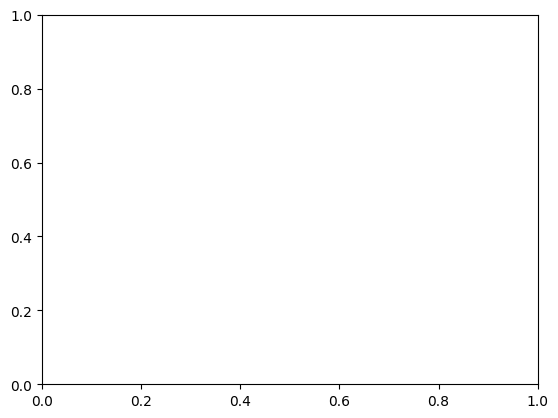

In [27]:
# plot the ans
plt.scatter(test_ans, y_pred)
plt.plot([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0.01, 1.01], color='red', linestyle='dashed')
plt.plot([0, 1], [-0.01, 0.99], color='red', linestyle='dashed')
plt.xlabel('ans')
plt.ylabel('pred')
plt.xlim(0.2,0.5)
plt.ylim(0.2,0.5)
plt.grid()
plt.show()


100%|██████████| 8/8 [00:00<00:00, 21.15it/s]


IndexError: list index out of range

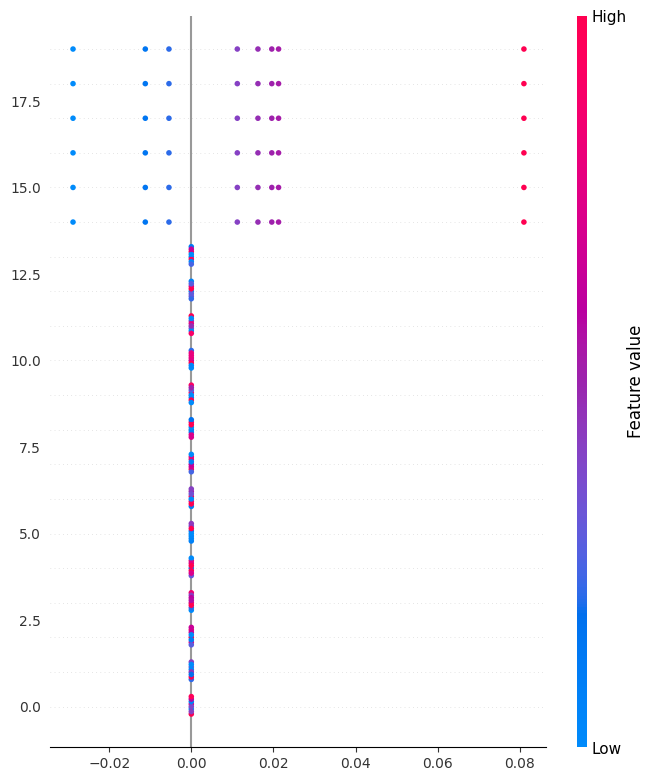

In [ ]:
#shap
import shap
feature_names = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
all_feature_names = []
for i in range(0,4):
    for name in feature_names:
        all_feature_names.append(name + str(i))
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_val)
# pd stats name
shap.summary_plot(shap_values, X_val, feature_names=all_feature_names)



C:\Users\ricky\AppData\Local\Temp\ipykernel_12888\1006743920.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=sorted_idx)


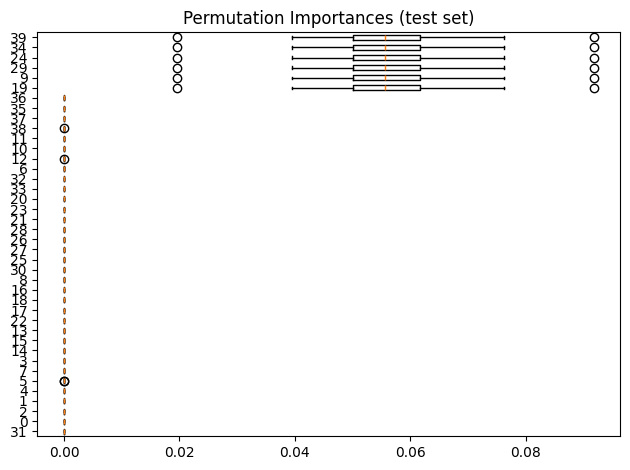

In [ ]:
# permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=sorted_idx)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()


In [ ]:
#train row by row
#split the data
X_train, X_val, y_train, y_val = train_test_split(train_rbr_x, train_rbr_y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

# cv
model = XGBRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'cv mse: {scores.mean()}')
#rmse
print(f'cv rmse: {np.sqrt(-scores.mean())}')

# fit the model
model.fit(X_train, y_train)
print(model.feature_importances_)
# predict
y_pred = model.predict(X_val)
# create a fake y_pred fill with 0.6
y_pred_ = np.full(y_pred.shape, 0.6)
print('y_pred:')
# is diff less than 1% of the ans is correct
def calculate_accuracy_in_chunks(y_pred, y_val, chunk_size=1000):
    total_correct = 0
    total_samples = y_val.shape[0]
    
    for start_idx in range(0, total_samples, chunk_size):
        end_idx = min(start_idx + chunk_size, total_samples)
        
        # 取出當前chunk的預測值和實際值
        y_pred_chunk = y_pred[start_idx:end_idx]
        y_val_chunk = y_val[start_idx:end_idx]
        
        # 計算當前chunk中預測正確的數量
        correct_predictions = np.sum(np.abs(y_pred_chunk - y_val_chunk) < y_val_chunk * 0.01)
        total_correct += correct_predictions
    
    return total_correct / total_samples
# 計算並輸出準確率
accuracy = calculate_accuracy_in_chunks(y_pred_, y_val)
print(f'Accuracy: {accuracy:.4f}')

(239968, 4)
(59992, 4)
(239968, 1)
(59992, 1)
cv mse: -0.042809289530257866
cv rmse: 0.2069040587573329
[0.22765946 0.2899108  0.22895764 0.25347212]
y_pred:
Accuracy: 0.0000
